Import Library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

Read Dataset

In [2]:
data = pd.read_csv('Dataset beasiswa .csv', encoding='latin-1')
df = data
df.head(10)

,No,Nama Lengkap,Prodi,Jenis Kelamin,Jarak Tempat Tinggal kekampus (Km),Asal Sekolah,Tahun Lulus,SKS,Ikut Organisasi,Ikut UKM,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1.0,GALAN PRASETIO,Bimbingan dan Konseling | Reguler,L,Dekat,SMAN 1 GEDONG TATAAN,2020.0,21.0,Ikut,Ikut,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,FINGKY RANDIANSYAH,Bimbingan dan Konseling | Reguler,L,Dekat,SMK HAMPAR BAIDURI,2020.0,21.0,Tidak,Ikut,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,ADELIA PANE,Bimbingan dan Konseling | Reguler,P,Dekat,SMK HAMPAR BAIDURI,2020.0,21.0,Tidak,Ikut,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,DWI HANDOKO,Bimbingan dan Konseling | Reguler,L,Dekat,SMA MA'ARIF NU BUMIRESTU,2020.0,21.0,Tidak,Ikut,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,DESTRI FERAWANTI GUSTINI,Bimbingan dan Konseling | Reguler,P,Jauh,SMA 2 NEGERI AGUNG,2020.0,21.0,Tidak,Ikut,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,ANIS SETIYAWATI,Bimbingan dan Konseling | Reguler,P,Dekat,MA MATHLA'UL ANWAR,2020.0,21.0,Tidak,Ikut,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,DENDY FERNANDO,Bimbingan dan Konseling | Reguler,L,Dekat,MA MA'ARIF 4 KALIREJO,2020.0,21.0,Tidak,Ikut,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,ALFIN M. YUNUS. S,Bimbingan dan Konseling | Reguler,L,Dekat,SMAN 1 KOTAAGUNG,2020.0,21.0,Tidak,Ikut,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,INTAN KHAIRUNNISA,Bimbingan dan Konseling | Reguler,P,Dekat,SMK HAMPAR BAIDURI,2020.0,21.0,Tidak,Ikut,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,INDAH SEPTIANI,Bimbingan dan Konseling | Reguler,P,Dekat,SMK HAMPAR BAIDURI KALIANDA,2020.0,21.0,Tidak,Ikut,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Preprocessing Data

In [3]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
No                                       1
Nama Lengkap                             1
Prodi                                    1
Jenis Kelamin                            1
Jarak Tempat Tinggal kekampus (Km)       1
Asal Sekolah                             1
Tahun Lulus                              1
SKS                                      1
Ikut Organisasi                          1
Ikut UKM                                 1
IPK                                      1
Pekerjaan Orang Tua                      1
Penghasilan                              1
Tanggungan                               1
Status Beasiswa                          1
Unnamed: 15                           1043
Unnamed: 16                           1043
Unnamed: 17                           1043
Unnamed: 18                           1043
Unnamed: 19                           1043
Unnamed: 20                           1043
Unnamed: 21                           1043
Unnamed: 22                

In [14]:
# Drop rows with missing values in relevant columns
df = df.dropna(subset=['IPK', 'Penghasilan', 'Ikut Organisasi', 'Ikut UKM', 'Status Beasiswa'])

In [5]:
# Encode target column (Status Beasiswa)
df['Status Beasiswa'] = df['Status Beasiswa'].map({'Terima': 1, 'Tidak': 0})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23616\151105243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status Beasiswa'] = df['Status Beasiswa'].map({'Terima': 1, 'Tidak': 0})


In [6]:
# Select features and target
X = df[['IPK', 'Penghasilan', 'Ikut Organisasi', 'Ikut UKM']]
y = df['Status Beasiswa']

In [7]:
# One-hot encode
X = pd.get_dummies(X, drop_first=True)

In [8]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah data training dan testing
print(f"Data Training: {len(X_train)} samples")
print(f"Data Testing: {len(X_test)} samples")



Data Training: 833 samples
Data Testing: 209 samples


**Decision Tree**

Data Testing

Decision Tree Test Accuracy: 0.72
Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.83       148
           1       0.60      0.10      0.17        61

    accuracy                           0.72       209
   macro avg       0.66      0.54      0.50       209
weighted avg       0.69      0.72      0.64       209



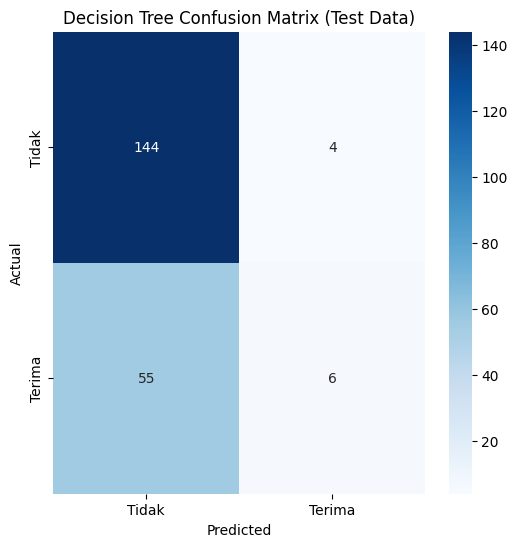

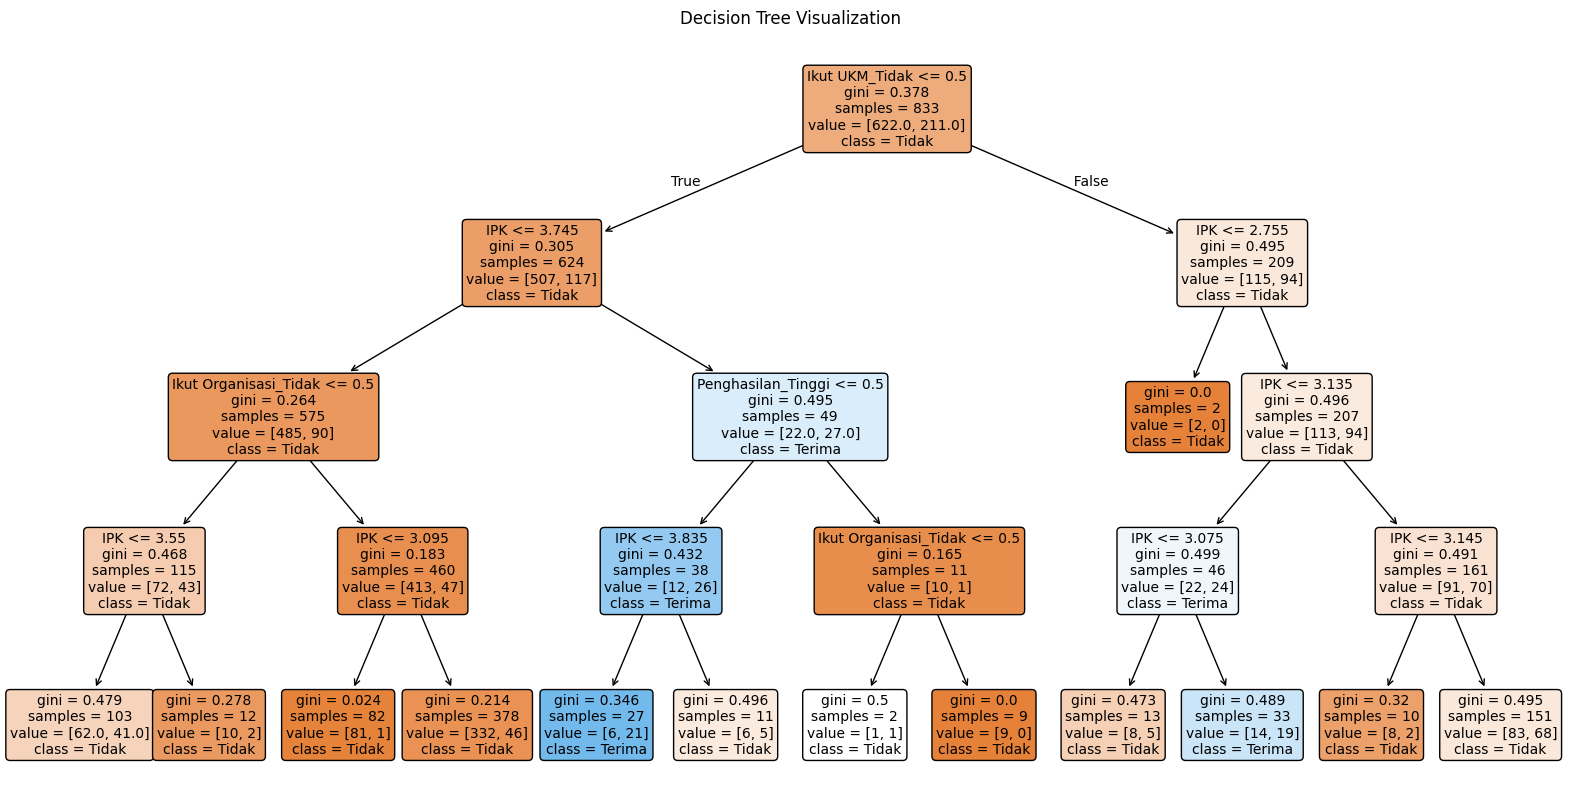

In [9]:
# initialitation model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
dt_predictions_test = dt_model.predict(X_test)
dt_predictions_train = dt_model.predict(X_train)

# Evaluate on Test Data
dt_accuracy_test = accuracy_score(y_test, dt_predictions_test)
print(f"Decision Tree Test Accuracy: {dt_accuracy_test:.2f}")
print("Test Data Classification Report:")
print(classification_report(y_test, dt_predictions_test))

# Visualize Decision Tree Confusion Matrix (Test Data)
dt_conf_matrix = confusion_matrix(y_test, dt_predictions_test)
plt.figure(figsize=(6, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Tidak', 'Terima'], yticklabels=['Tidak', 'Terima'])
plt.title("Decision Tree Confusion Matrix (Test Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Tidak', 'Terima'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

Data Training

Decision Tree Train Accuracy: 0.77
Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       622
           1       0.67      0.19      0.30       211

    accuracy                           0.77       833
   macro avg       0.72      0.58      0.58       833
weighted avg       0.75      0.77      0.72       833



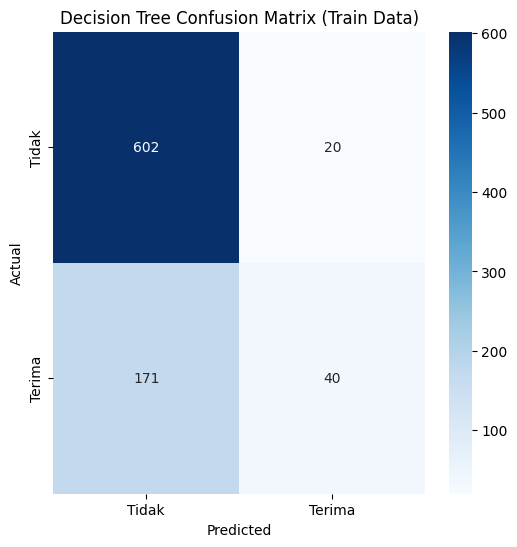

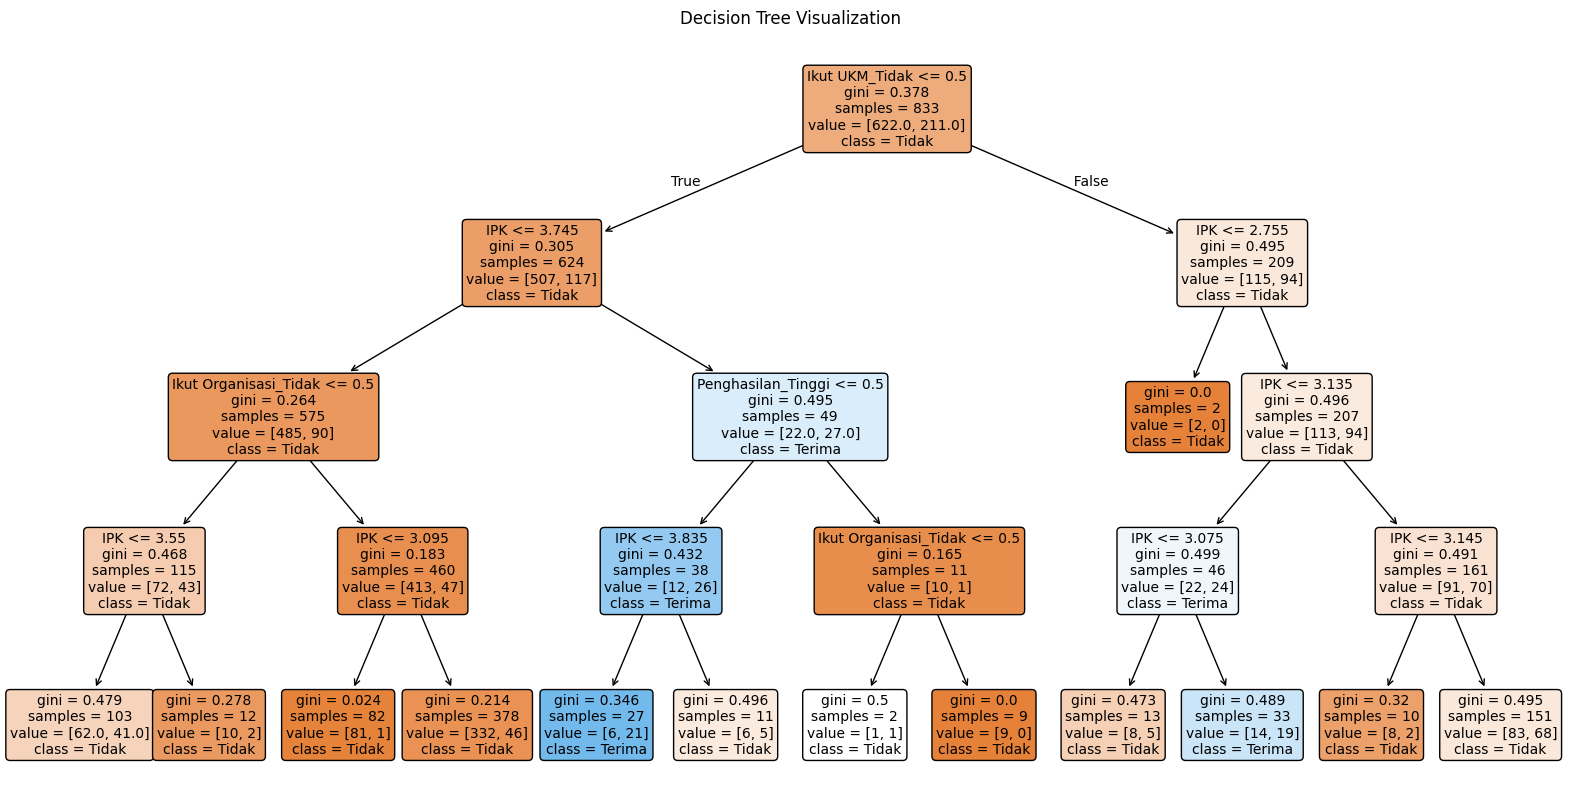

In [10]:
# initialitation model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
dt_predictions_test = dt_model.predict(X_test)
dt_predictions_train = dt_model.predict(X_train)

# Evaluate on Training Data
dt_accuracy_train = accuracy_score(y_train, dt_predictions_train)
print(f"Decision Tree Train Accuracy: {dt_accuracy_train:.2f}")
print("Training Data Classification Report:")
print(classification_report(y_train, dt_predictions_train))

# Visualize Decision Tree Confusion Matrix (Test Data)
dt_conf_matrix = confusion_matrix(y_train, dt_predictions_train)
plt.figure(figsize=(6, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Tidak', 'Terima'], yticklabels=['Tidak', 'Terima'])
plt.title("Decision Tree Confusion Matrix (Train Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Tidak', 'Terima'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

**Random Forest**

Data Testing

Random Forest Test Accuracy: 0.70
Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       148
           1       0.49      0.28      0.35        61

    accuracy                           0.70       209
   macro avg       0.62      0.58      0.58       209
weighted avg       0.67      0.70      0.68       209



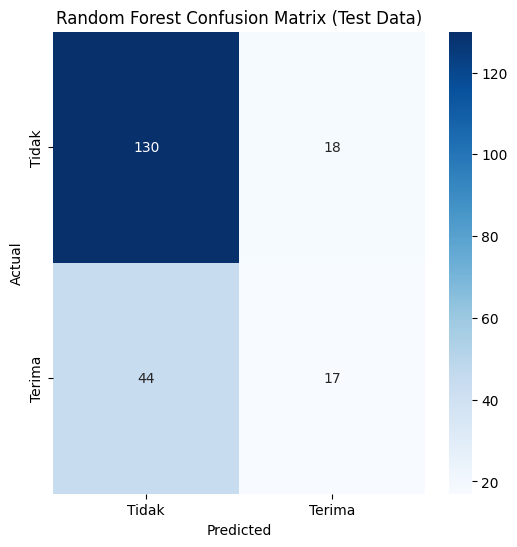

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23616\381825827.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")


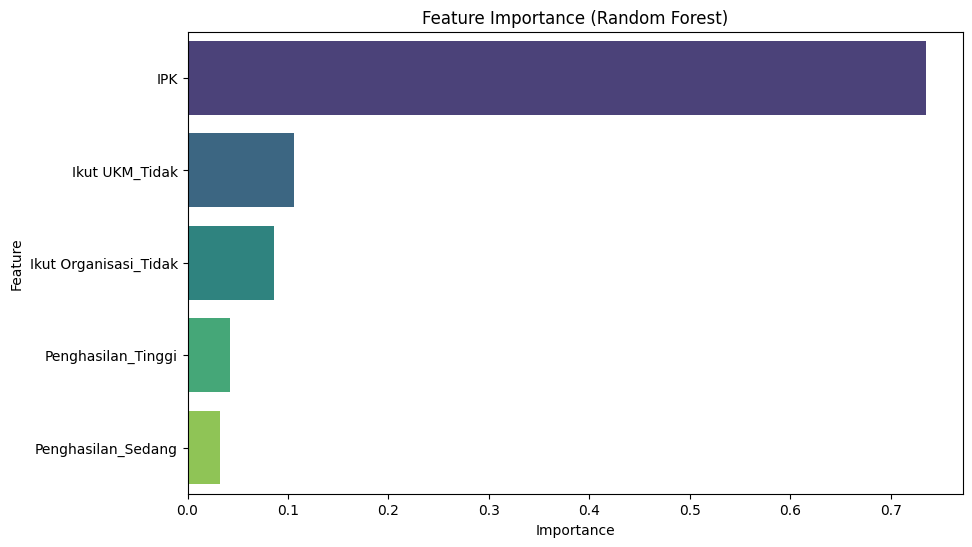

In [11]:
#initialation model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions_test = rf_model.predict(X_test)
rf_predictions_train = rf_model.predict(X_train)

# Evaluate on Test Data
rf_accuracy_test = accuracy_score(y_test, rf_predictions_test)
print(f"Random Forest Test Accuracy: {rf_accuracy_test:.2f}")
print("Test Data Classification Report:")
print(classification_report(y_test, rf_predictions_test))

# Visualize Random Forest Confusion Matrix (Test Data)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions_test)
plt.figure(figsize=(6, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Tidak', 'Terima'], yticklabels=['Tidak', 'Terima'])
plt.title("Random Forest Confusion Matrix (Test Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance for Random Forest
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Data Training

Random Forest Train Accuracy: 0.86
Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       622
           1       0.75      0.64      0.69       211

    accuracy                           0.86       833
   macro avg       0.82      0.79      0.80       833
weighted avg       0.85      0.86      0.85       833



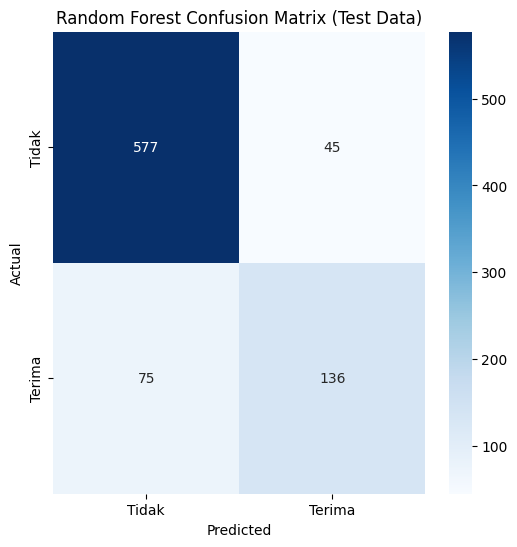

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23616\1577378955.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")


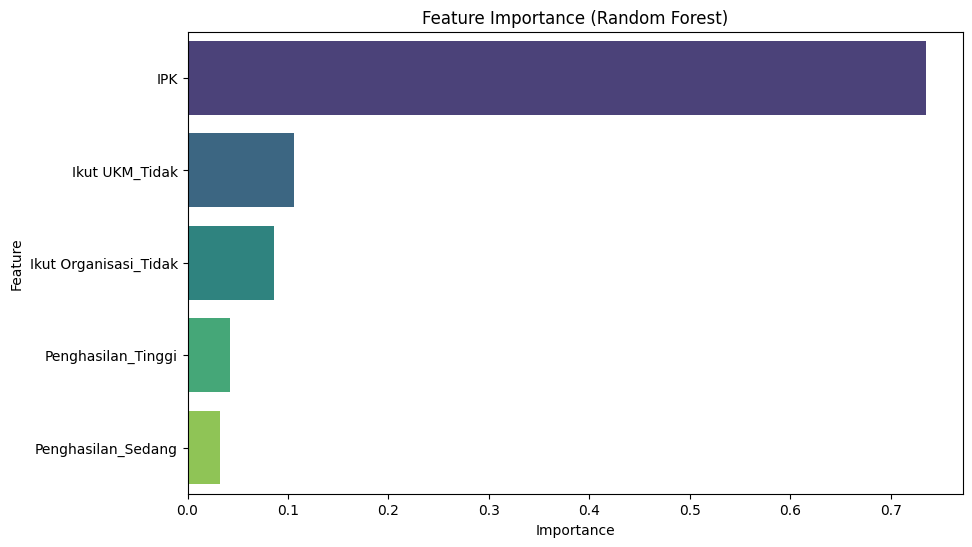

In [12]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions_test = rf_model.predict(X_test)
rf_predictions_train = rf_model.predict(X_train)

# Evaluate on Training Data
rf_accuracy_train = accuracy_score(y_train, rf_predictions_train)
print(f"Random Forest Train Accuracy: {rf_accuracy_train:.2f}")
print("Training Data Classification Report:")
print(classification_report(y_train, rf_predictions_train))

# Visualize Random Forest Confusion Matrix (Test Data)
rf_conf_matrix = confusion_matrix(y_train, rf_predictions_train)
plt.figure(figsize=(6, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Tidak', 'Terima'], yticklabels=['Tidak', 'Terima'])
plt.title("Random Forest Confusion Matrix (Test Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance for Random Forest
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

**Perbandingan kedua algoritma**

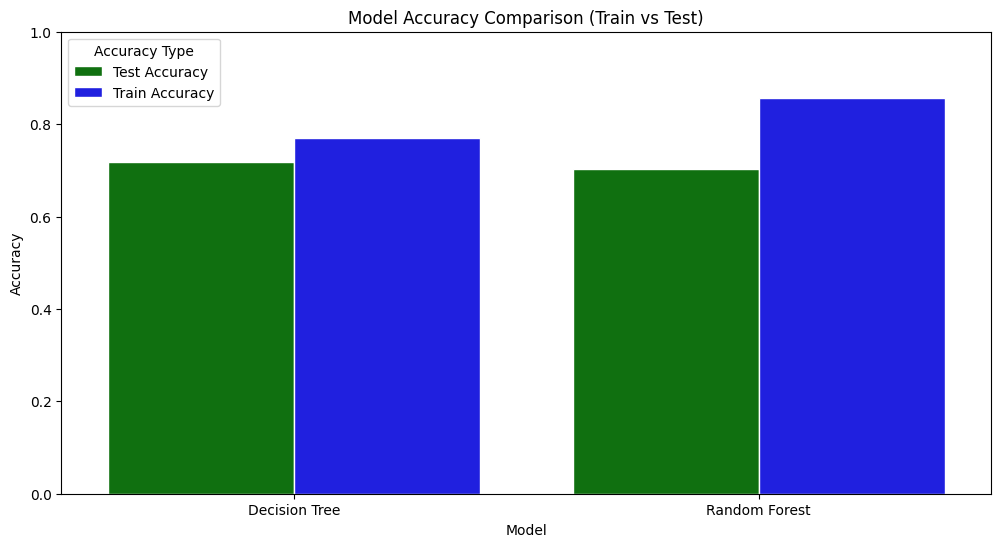

In [13]:
# Membuat DataFrame untuk data akurasi
accuracy_data = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Test Accuracy': [dt_accuracy_test, rf_accuracy_test],
    'Train Accuracy': [dt_accuracy_train, rf_accuracy_train]
})

# Mengatur ukuran figure
plt.figure(figsize=(12, 6))

# Mengatur data menjadi format yang panjang untuk seaborn
accuracy_data_long = accuracy_data.melt(id_vars='Model', value_vars=['Test Accuracy', 'Train Accuracy'], var_name='Accuracy Type', value_name='Accuracy')

# Membuat barplot side-by-side
sns.barplot(x='Model', y='Accuracy', hue='Accuracy Type', data=accuracy_data_long, palette=["Green","Blue"], edgecolor="white")

# Membatasi sumbu y dari 0 ke 1.0
plt.ylim(0, 1.0)

# Menambahkan judul dan legenda
plt.title("Model Accuracy Comparison (Train vs Test)")
plt.legend(title='Accuracy Type')

# Menampilkan grafik
plt.show()